In [1]:
#here we have data of hospitals in different states at present. We analyse this data by using different libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.set_option("display.max_rows",None,"display.max_columns",None)

In [5]:
hospital_beds=pd.read_csv("HospitalBedsIndia.csv")

In [6]:
hospital_beds

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,6,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,7,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,8,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
8,9,Daman & Diu,4,2,NaN,2,8,298,5,240,0,0
9,10,Delhi,534,25,9.0,47,615,20572,0,0,109,24383


In [7]:
#changing column names

In [8]:
hospital_beds.columns=["Sno","State/UT","Primary Health Centres","Community Health Centres","SubDistrict Hospitals","District Hospitals","Public Health Facilities","Public Beds","Rural Hospitals","Rural Beds","Urban Hospitals","Urban Beds"]

In [9]:
hospital_beds.head(3)

,Sno,State/UT,Primary Health Centres,Community Health Centres,SubDistrict Hospitals,District Hospitals,Public Health Facilities,Public Beds,Rural Hospitals,Rural Beds,Urban Hospitals,Urban Beds
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268


In [10]:
#removing irrelevant columns

In [11]:
hospital_beds=hospital_beds.drop("Sno",axis=1)

In [12]:
hospital_beds=hospital_beds.drop(36)

In [13]:
# as the dataset have many empty cells we fill those cells

In [14]:
hospital_beds.fillna(0,inplace=True)

In [15]:
hospital_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State/UT                  36 non-null     object 
 1   Primary Health Centres    36 non-null     object 
 2   Community Health Centres  36 non-null     int64  
 3   SubDistrict Hospitals     36 non-null     float64
 4   District Hospitals        36 non-null     int64  
 5   Public Health Facilities  36 non-null     int64  
 6   Public Beds               36 non-null     int64  
 7   Rural Hospitals           36 non-null     int64  
 8   Rural Beds                36 non-null     int64  
 9   Urban Hospitals           36 non-null     int64  
 10  Urban Beds                36 non-null     int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 3.4+ KB


In [16]:
hospital_beds["Primary Health Centres"]=hospital_beds["Primary Health Centres"].astype("int")

In [17]:
hospital_beds["SubDistrict Hospitals"]=hospital_beds["SubDistrict Hospitals"].astype("int")

In [18]:
hospital_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   State/UT                  36 non-null     object
 1   Primary Health Centres    36 non-null     int32 
 2   Community Health Centres  36 non-null     int64 
 3   SubDistrict Hospitals     36 non-null     int32 
 4   District Hospitals        36 non-null     int64 
 5   Public Health Facilities  36 non-null     int64 
 6   Public Beds               36 non-null     int64 
 7   Rural Hospitals           36 non-null     int64 
 8   Rural Beds                36 non-null     int64 
 9   Urban Hospitals           36 non-null     int64 
 10  Urban Beds                36 non-null     int64 
dtypes: int32(2), int64(8), object(1)
memory usage: 3.1+ KB


In [19]:
#total primary health centres in India

In [20]:
hospital_beds["Primary Health Centres"].sum()

29899

In [21]:
#states with highest primary health centres.

In [22]:
hospital_beds[["State/UT","Primary Health Centres"]].sort_values("Primary Health Centres",ascending=False).style.background_gradient(cmap="Reds")

,State/UT,Primary Health Centres
33,Uttar Pradesh,3277
20,Maharashtra,2638
16,Karnataka,2547
28,Rajasthan,2463
4,Bihar,2007
30,Tamil Nadu,1854
11,Gujarat,1770
19,Madhya Pradesh,1420
1,Andhra Pradesh,1417
35,West Bengal,1374


In [23]:
#graphical representation

In [24]:
plt.rcParams["figure.figsize"]=17,8

In [25]:
plt.style.use("ggplot")

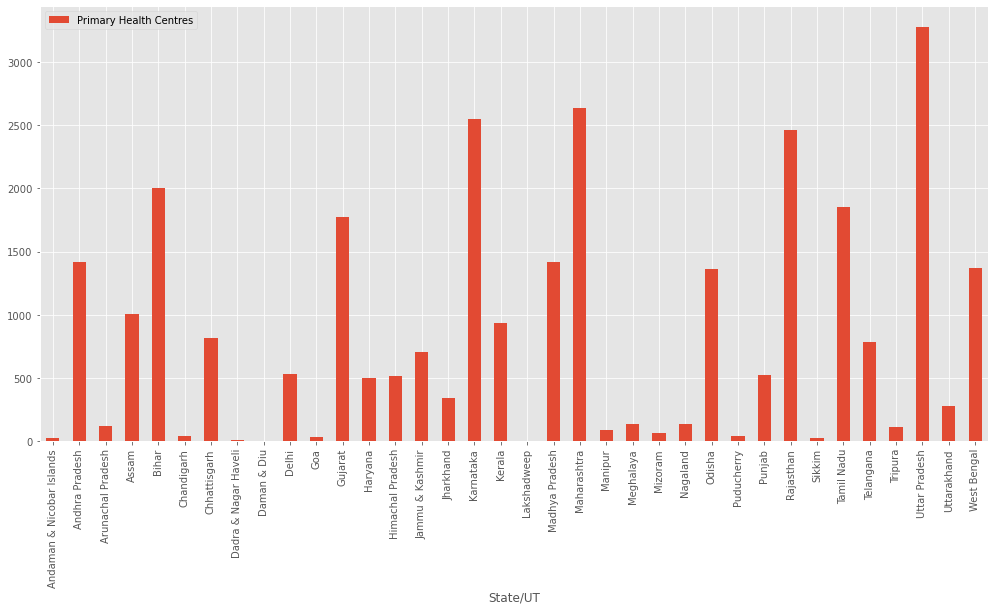

In [26]:
hospital_beds.plot(kind="bar",x="State/UT",y="Primary Health Centres")

In [27]:
hospital_beds.head(1)

,State/UT,Primary Health Centres,Community Health Centres,SubDistrict Hospitals,District Hospitals,Public Health Facilities,Public Beds,Rural Hospitals,Rural Beds,Urban Hospitals,Urban Beds
0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27,575,3,500


In [28]:
#total community health centers in India.

In [29]:
hospital_beds["Community Health Centres"].sum()

5568

In [30]:
#states with highest community health centres

In [31]:
hospital_beds[["State/UT","Community Health Centres"]].sort_values("Community Health Centres",ascending=False).style.background_gradient(cmap="Reds")

,State/UT,Community Health Centres
33,Uttar Pradesh,671
28,Rajasthan,579
20,Maharashtra,430
35,West Bengal,406
30,Tamil Nadu,385
11,Gujarat,385
25,Odisha,377
19,Madhya Pradesh,324
17,Kerala,229
16,Karnataka,207


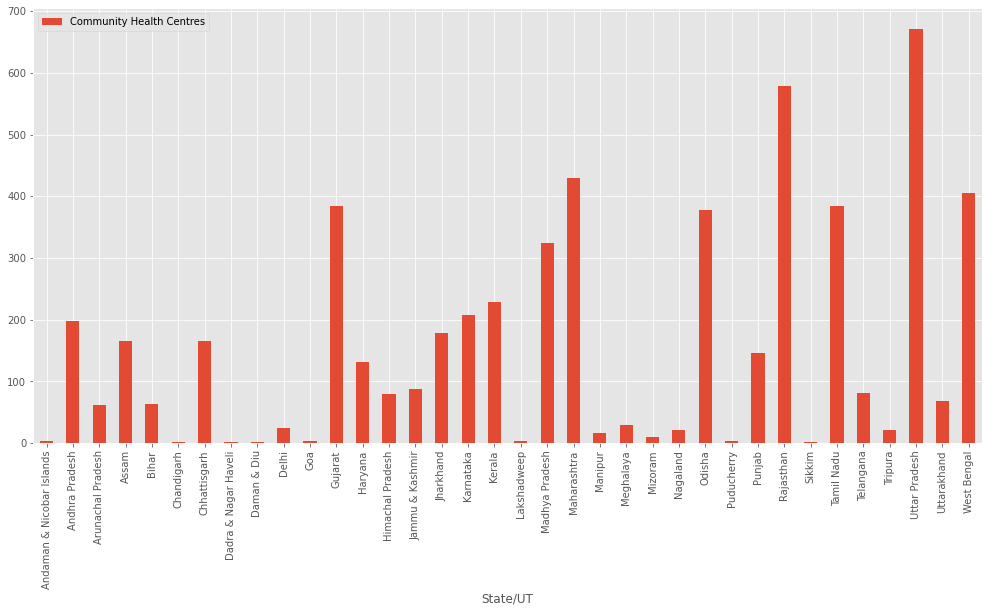

In [32]:
hospital_beds.plot(kind="bar",x="State/UT",y="Community Health Centres")

In [33]:
#total SubDistrict hospitals in India

In [34]:
hospital_beds["SubDistrict Hospitals"].sum()

1255

In [35]:
#states with highest SubDistrict hospitals

In [37]:
hospital_beds[["State/UT","SubDistrict Hospitals"]].sort_values("SubDistrict Hospitals",ascending=False).style.background_gradient(cmap="Reds")

,State/UT,SubDistrict Hospitals
30,Tamil Nadu,310
16,Karnataka,147
20,Maharashtra,101
17,Kerala,82
19,Madhya Pradesh,72
35,West Bengal,70
28,Rajasthan,64
13,Himachal Pradesh,61
27,Punjab,47
31,Telangana,47


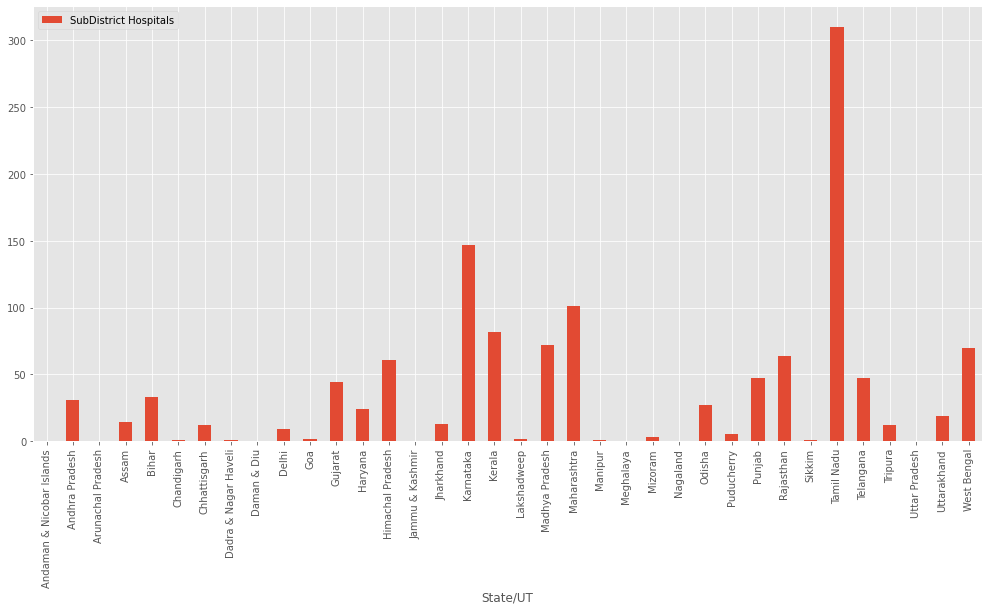

In [38]:
hospital_beds.plot(kind="bar",x="State/UT",y="SubDistrict Hospitals")

In [39]:
#total district hospitals in India

In [40]:
hospital_beds["District Hospitals"].sum()

1003

In [41]:
#states with highest district hospitals

In [42]:
hospital_beds[["State/UT","District Hospitals"]].sort_values("District Hospitals",ascending=False).style.background_gradient(cmap="Reds")

,State/UT,District Hospitals
33,Uttar Pradesh,174
20,Maharashtra,70
35,West Bengal,55
17,Kerala,53
19,Madhya Pradesh,51
9,Delhi,47
4,Bihar,43
16,Karnataka,42
11,Gujarat,37
25,Odisha,35


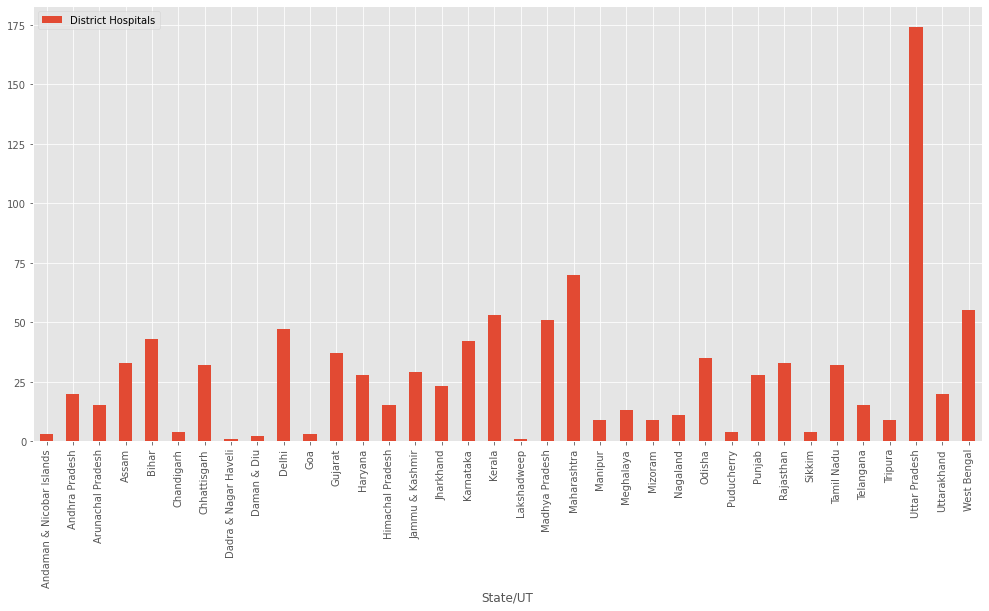

In [43]:
hospital_beds.plot(kind="bar",x="State/UT",y="District Hospitals")

In [44]:
hospital_beds.tail(2)

,State/UT,Primary Health Centres,Community Health Centres,SubDistrict Hospitals,District Hospitals,Public Health Facilities,Public Beds,Rural Hospitals,Rural Beds,Urban Hospitals,Urban Beds
34,Uttarakhand,275,69,19,20,383,6660,410,3284,50,5228
35,West Bengal,1374,406,70,55,1905,51163,1272,19684,294,58882


In [45]:
#total public health facilities in India

In [46]:
hospital_beds["Public Health Facilities"].sum()

37725

In [47]:
#states with highest public health facilities

In [48]:
hospital_beds[["State/UT","Public Health Facilities"]].sort_values("Public Health Facilities",ascending=False).style.background_gradient(cmap="Reds")

,State/UT,Public Health Facilities
33,Uttar Pradesh,4122
20,Maharashtra,3239
28,Rajasthan,3139
16,Karnataka,2943
30,Tamil Nadu,2581
11,Gujarat,2236
4,Bihar,2146
35,West Bengal,1905
19,Madhya Pradesh,1867
25,Odisha,1799


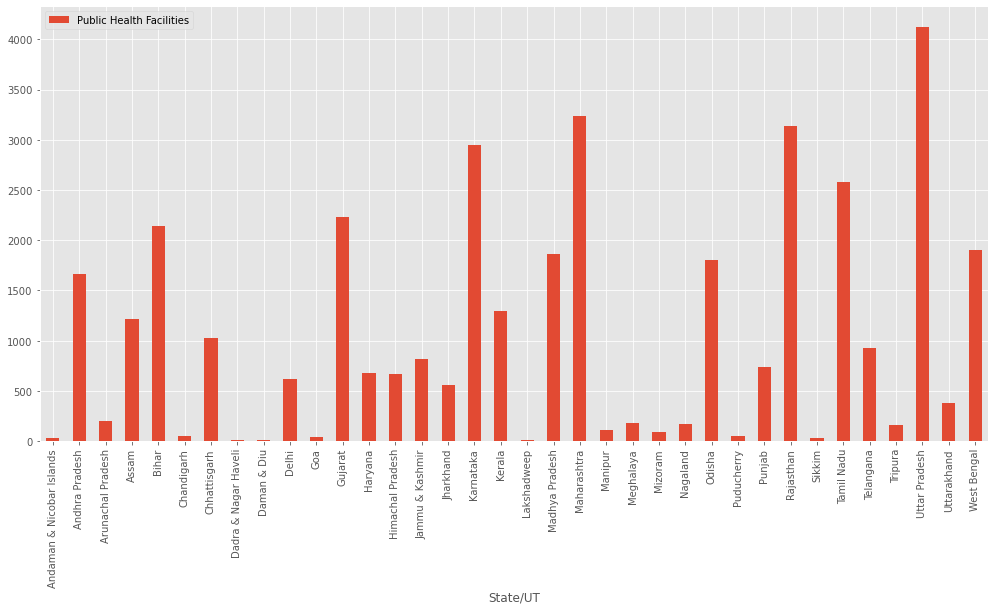

In [49]:
hospital_beds.plot(kind="bar",x="State/UT",y="Public Health Facilities")

In [50]:
hospital_beds.head(2)

,State/UT,Primary Health Centres,Community Health Centres,SubDistrict Hospitals,District Hospitals,Public Health Facilities,Public Beds,Rural Hospitals,Rural Beds,Urban Hospitals,Urban Beds
0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31,20,1666,60799,193,6480,65,16658


In [51]:
#total rural hospitals in India

In [52]:
hospital_beds["Rural Hospitals"].sum()

19810

In [53]:
#states with highest rural hospitals

In [54]:
hospital_beds[["State/UT","Rural Hospitals"]].sort_values("Rural Hospitals",ascending=False).style.background_gradient(cmap="Reds")

,State/UT,Rural Hospitals
33,Uttar Pradesh,4442
16,Karnataka,2471
25,Odisha,1655
35,West Bengal,1272
3,Assam,1176
17,Kerala,981
4,Bihar,930
31,Telangana,802
13,Himachal Pradesh,705
30,Tamil Nadu,692


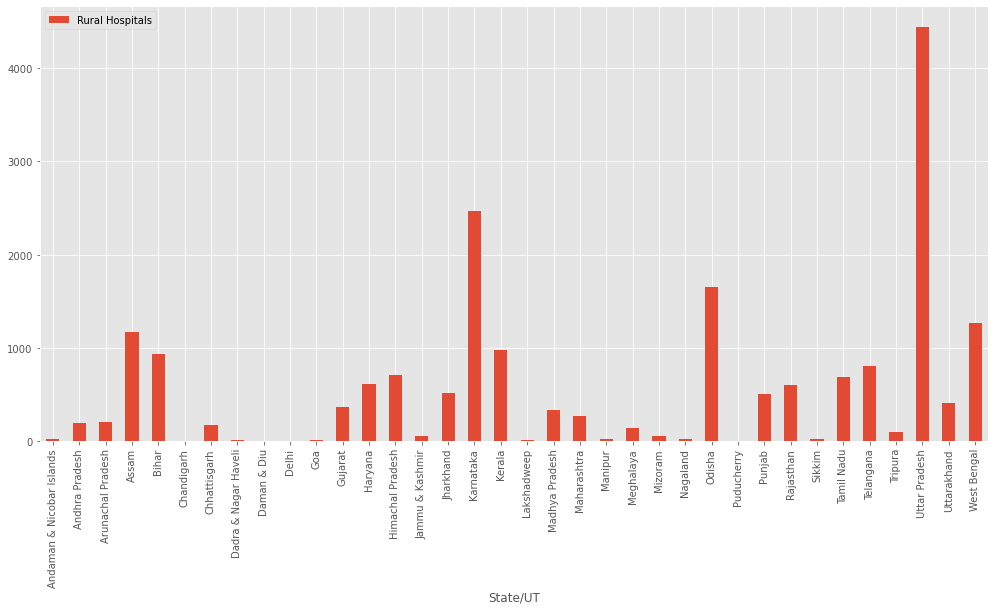

In [55]:
hospital_beds.plot(kind="bar",x="State/UT",y="Rural Hospitals")

In [56]:
#total urban hospitals in India

In [57]:
hospital_beds["Urban Hospitals"].sum()

3772

In [58]:
#states with highest urban hospitals

In [59]:
hospital_beds[["State/UT","Urban Hospitals"]].sort_values("Urban Hospitals",ascending=False).style.background_gradient(cmap="Reds")

,State/UT,Urban Hospitals
30,Tamil Nadu,525
20,Maharashtra,438
16,Karnataka,374
17,Kerala,299
35,West Bengal,294
33,Uttar Pradesh,193
27,Punjab,172
28,Rajasthan,150
25,Odisha,149
11,Gujarat,122


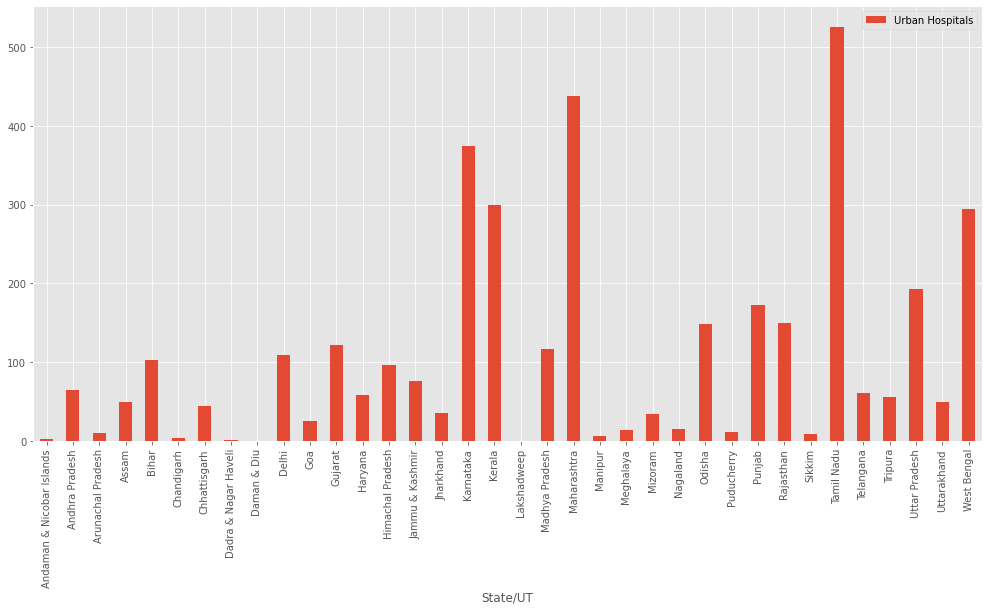

In [60]:
hospital_beds.plot(kind="bar",x="State/UT",y="Urban Hospitals")

In [61]:
#adding a new column

In [64]:
#total number of hospitals in a state

In [65]:
hospital_beds.head(1)

,State/UT,Primary Health Centres,Community Health Centres,SubDistrict Hospitals,District Hospitals,Public Health Facilities,Public Beds,Rural Hospitals,Rural Beds,Urban Hospitals,Urban Beds
0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27,575,3,500


In [66]:
hospital_beds["Total Hospitals"]=hospital_beds["Primary Health Centres"]+hospital_beds["Community Health Centres"]+hospital_beds["SubDistrict Hospitals"]+hospital_beds["District Hospitals"]+hospital_beds["Public Health Facilities"]+hospital_beds["Public Beds"]+hospital_beds["Rural Hospitals"]+hospital_beds["Rural Beds"]+hospital_beds["Urban Hospitals"]+hospital_beds["Urban Beds"]

In [67]:
hospital_beds

,State/UT,Primary Health Centres,Community Health Centres,SubDistrict Hospitals,District Hospitals,Public Health Facilities,Public Beds,Rural Hospitals,Rural Beds,Urban Hospitals,Urban Beds,Total Hospitals
0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27,575,3,500,2419
1,Andhra Pradesh,1417,198,31,20,1666,60799,193,6480,65,16658,87527
2,Arunachal Pradesh,122,62,0,15,199,2320,208,2136,10,268,5340
3,Assam,1007,166,14,33,1220,19115,1176,10944,50,6198,39923
4,Bihar,2007,63,33,43,2146,17796,930,6083,103,5936,35140
5,Chandigarh,40,2,1,4,47,3756,0,0,4,778,4632
6,Chhattisgarh,813,166,12,32,1023,14354,169,5070,45,4342,26026
7,Dadra & Nagar Haveli,9,2,1,1,13,568,10,273,1,316,1194
8,Daman & Diu,4,2,0,2,8,298,5,240,0,0,559
9,Delhi,534,25,9,47,615,20572,0,0,109,24383,46294


In [68]:
#total hospitals in India

In [69]:
hospital_beds["Total Hospitals"].sum()

1548817

In [71]:
#states with highest number of hospitals

In [72]:
hospital_beds[["State/UT","Total Hospitals"]].sort_values("Total Hospitals",ascending=False).style.background_gradient(cmap="Reds")

,State/UT,Total Hospitals
30,Tamil Nadu,156527
33,Uttar Pradesh,147449
16,Karnataka,135229
35,West Bengal,135105
20,Maharashtra,127633
28,Rajasthan,90722
1,Andhra Pradesh,87527
17,Kerala,81389
11,Gujarat,78367
19,Madhya Pradesh,71164


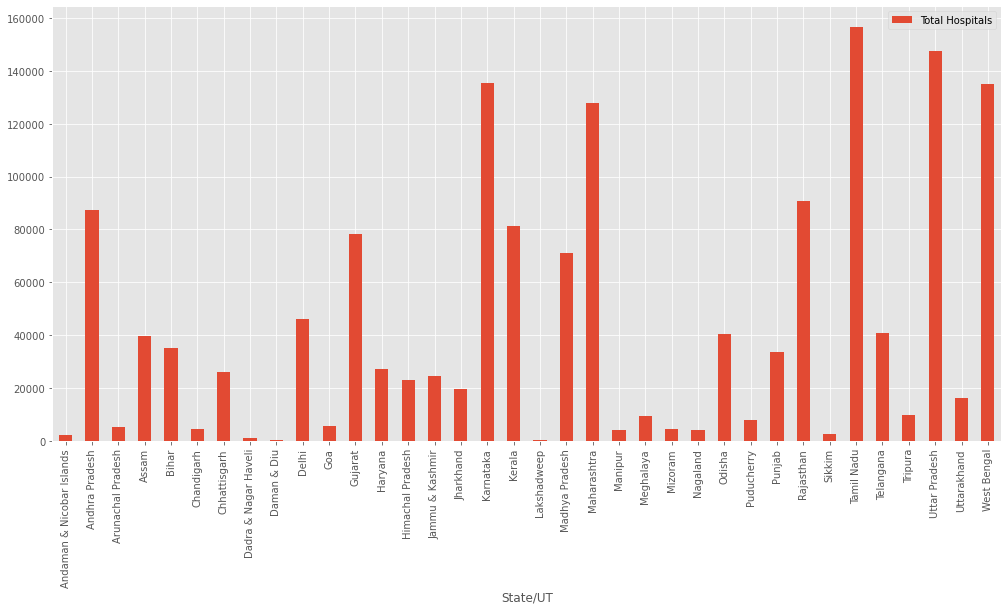

In [73]:
hospital_beds.plot(kind="bar",x="State/UT",y="Total Hospitals")